# 第二組分工
* 林庭琮	蔡睿宸	陳宇揚	莊詠鈞	白孜謙	羅凱全
* 莊詠鈞：7 image point processing
* 白孜謙：gaussion,sharpening mean
* 陳宇揚：shift,sobel,thresholding
* 羅凱全：downsampling,upsampling
* 蔡睿宸：dilation,erosion
* 林庭琮：reflection,rotate,scale


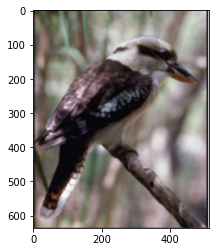

image shape:  (636, 514, 3)
pixel space in position (100, 150):  [97 80 60]
image type:  uint8


In [33]:
from  matplotlib import pyplot as plt
import cv2
import numpy as np

image = cv2.imread("bird.png") # the decoded images will have the channels stored in B G R order.

# change the image matrix into R G B order.
# method 1
# b,g,r = cv2.split(im)
# image = cv2.merge([r,g,b])

# method 2
image = image[:,:,::-1]

# show the image
plt.imshow(image)
plt.show()

# show the detail
print('image shape: ', image.shape) # show the image's shape(dimention).
print('pixel space in position (100, 150): ', image[100,150]) # one pixel color space.
print('image type: ', image.dtype) # show the format in which the image is stored. 

# 7 image point processing

At 2. introduction to Computer Vision (p.7) <br> 
In this section, use the RGB image matrix you create above to finish the jobs.

Image data type matters!
* uint8: 0 ~ 255
* int32: -2^31 ~ 2^31

When you plot the image, data type matters too!
* int: 0 ~ 255
* float: 0 ~ 1

small tips that I found: 
* **int32** can't work with **cv2.COLOR_RGB2GRAY**
* keep the image type when using cv2.imread -> **cv2.IMREAD_UNCHANGED**

![image.png](https://i.imgur.com/D2amXGP.jpg)

## 1. invert

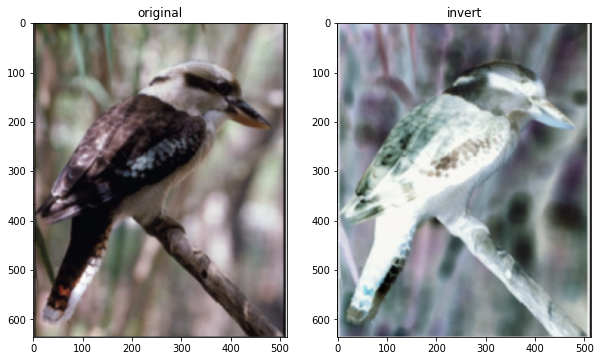

image_int:  (636, 514, 3)
res:  (636, 514, 3)


In [34]:
# image invert #
# you must plot both the original image and the modefied image as the result.

# -------- To do ------------- #
image_int = image.astype('int32')
res = np.clip(255 - image_int, 0, 255)
# ------------------------------- #
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('original')

plt.subplot(1, 2, 2)
plt.imshow(res)
plt.title('invert')
plt.show()

print('image_int: ', image_int.shape)
print('res: ', res.shape)

## 2. darken

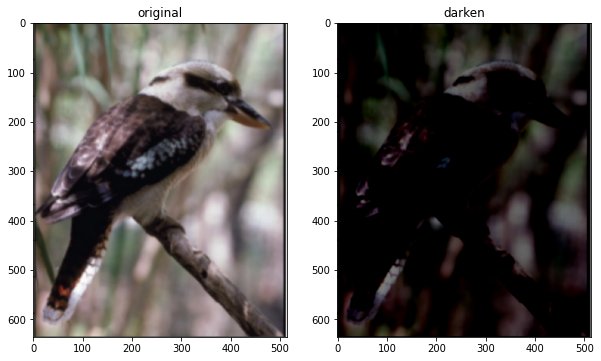

In [35]:
# image datken #
# you must plot both the original image and the modefied image as the result.

# -------- To do ------------- #
image_int = image.astype('int32')
result_img = np.clip(image_int-128, 0, 255)
plt.figure(figsize = (10,20))
plt.subplot(121)
plt.imshow(image_int)
plt.title('original')

plt.subplot(122)
plt.imshow(result_img)
plt.title('darken')

plt.show()
# ------------------------------- #

## 3. lighten

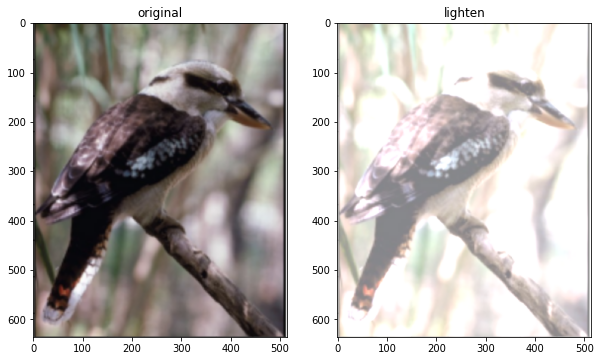

In [36]:
# image lighten #
# you must plot both the original image and the modefied image as the result.

# -------- To do ------------- #
image_int = image.astype('int32')
result_img = np.clip(image_int + 128, 0, 255)
plt.figure(figsize = (10,20))
plt.subplot(121)
plt.imshow(image_int)
plt.title('original')

plt.subplot(122)
plt.imshow(result_img)
plt.title('lighten')

plt.show()
# ------------------------------- #

## 4. lower contrast

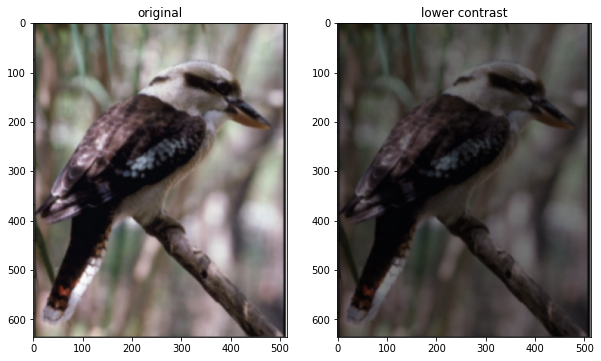

In [37]:
# image Lower Contrast #
# you must plot both the original image and the modefied image as the result.

# -------- To do ------------- #
image_int = image.astype('int32')
result_img = np.clip(image_int//2, 0,255)
plt.figure(figsize = (10,20))
plt.subplot(121)
plt.imshow(image_int)
plt.title('original')

plt.subplot(122)
plt.imshow(result_img)
plt.title('lower contrast')

plt.show()
# ------------------------------- #

## 5. raise contrast

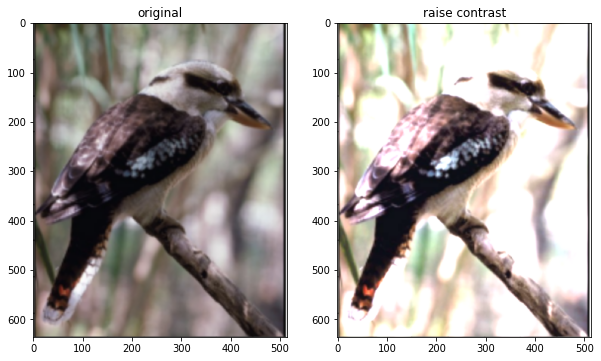

In [38]:
# image raise contrast #
# you must plot both the original image and the modefied image as the result.

# -------- To do ------------- #
image_int = image.astype('int32')
result_img = np.clip(image_int*2, 0, 255)
plt.figure(figsize = (10,20))
plt.subplot(121)
plt.imshow(image_int)
plt.title('original')

plt.subplot(122)
plt.imshow(result_img)
plt.title('raise contrast')

plt.show()
# ------------------------------- #

## 6. non-linear lower contrast

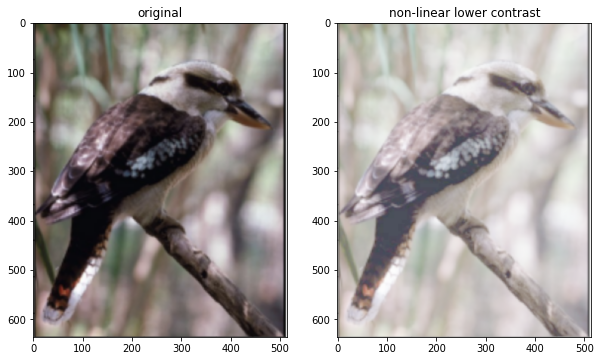

In [39]:
# Non-linear lower contrast #
# you must plot both the original image and the modefied image as the result.

# -------- To do ------------- #
image_int = image.astype('int32')
image_int_l = (image_int/255)**(1/3)*255
image_int_l = image_int_l.astype('int32')
result_img = np.clip(image_int_l, 0, 255)
plt.figure(figsize = (10,20))
plt.subplot(121)
plt.imshow(image_int)
plt.title('original')

plt.subplot(122)
plt.imshow(result_img)
plt.title('non-linear lower contrast')

plt.show()
# ------------------------------- #

## 7. non-linear raise contrast

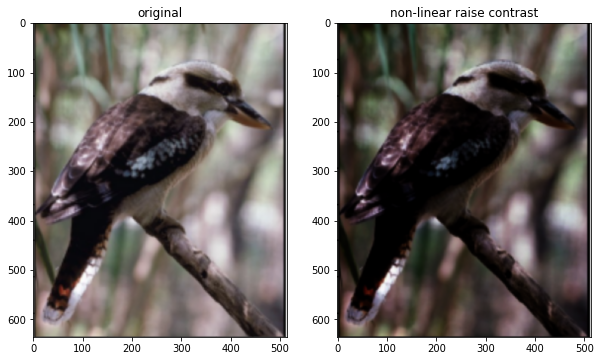

In [40]:
# Non-linear raise contrast #
# you must plot both the original image and the modefied image as the result.

# -------- To do ------------- #
image_int = image.astype('int32')
image_int_l = (image_int/255)**2*255
image_int_l = image_int_l.astype('int32')
result_img = np.clip(image_int_l, 0, 255)
plt.figure(figsize = (10,20))
plt.subplot(121)
plt.imshow(image_int)
plt.title('original')

plt.subplot(122)
plt.imshow(result_img)
plt.title('non-linear raise contrast')

plt.show()
# ------------------------------- #

# fliters

## pre-defined function

In [41]:
# define a function to manage the kernel choices

import math

def get_kernel(kernel_name, kernel_size = 7): # here we set the kernel_size to 7, when you call this function without kernel_size, the default is 7
  if kernel_name == 'gaussian':
    sigma = 0.3*((kernel_size-1)*0.5 - 1) + 0.8
    Gaussian=[]
    #各係數相加後總值
    total=0
    coordinate = (kernel_size-1)//2
    for i in range(-coordinate,coordinate+1,1):
      Filter_list = []
      for j in range(coordinate,-coordinate-1,-1): 
          #高斯函數公式
          # -------- To do ------------- #
          gau = math.exp(-(i*i+j*j)/2*sigma*sigma)
          Filter_list.append(gau)
          total+=gau
          # ------------------------------- #
      Gaussian+= [Filter_list]     
    return np.array(Gaussian)/total

  if kernel_name == 'sharpening':
    # -------- To do ------------- #
    Sharpening_Kernel = np.array([
                 [0,-1,0],
                 [-1,5,-1],
                 [0,-1,0] 
         ])
    # ------------------------------- #
    return Sharpening_Kernel

  if kernel_name == 'mean':
    # -------- To do ------------- #
    Mean_Kernel = np.ones([kernel_size,kernel_size])/(kernel_size**2)
    # ------------------------------- #
    return Mean_Kernel

  if kernel_name == 'shift':
    # -------- To do ------------- #
    Shift_Kernel= np.zeros([kernel_size,kernel_size])
    Shift_Kernel[0,(kernel_size+1)//2] = 1
    # ------------------------------- #
    return Shift_Kernel

  if kernel_name == 'dilation':
    # -------- To do ------------- #
    dilation_kernel = np.ones([kernel_size,kernel_size])
    # ------------------------------- #
    return dilation_kernel

  if kernel_name == 'erosion':
    # -------- To do ------------- #
    erosion_kernel = np.ones([kernel_size,kernel_size])
    # ------------------------------- #
    return erosion_kernel



  # if any other kernel...:

In [42]:
# define a function performing padding, it should be able to pad both grayscale image and rgb image
# zero-padding is enough

def padding_img(img, p_size, channel = 3,style='constant'):
  if channel == 3: # if it is a "r g b" image
    # -------- To do ------------- #
    b,g,r = cv2.split(img)
    rgb_list = [r,g,b]
    pading_list = []
    expand_size_x = b.shape[0]+p_size*2
    expand_size_y = b.shape[1]+p_size*2
    for i in rgb_list:
      padaing_array = np.zeros([expand_size_x,expand_size_y])
      for x in range(b.shape[0]):
          for y in range(b.shape[1]):
            padaing_array[x+p_size,y+p_size] = i[x,y] 
      pading_list.append(padaing_array)
    # ------------------------------- #
    return cv2.merge([pading_list[0], pading_list[1], pading_list[2]])
  elif channel == 1:
    return np.pad(img, p_size, style)
    

In [43]:
# define a function to do the convolution work it should be able to pad both grayscale image and rgb image
from tqdm import trange

def convolution(img, kernel):
  # the default of this function will do the convolution work for rgb image
  # the image in grayscale will trigger the ValueError in "row, col, depth = img.shape"
  # Therefore, do the convolution work for grayscale image!
  try:
    row, col, depth = img.shape
    print('rgb convolution')
    kernelsize = kernel.shape[0]
    resx=np.zeros((row,col,3)) #initial a result image
    padimg = padding_img(img,(kernelsize-1)//2)
    b,g,r = cv2.split(padimg)
    # -------- To do ------------- #
    n = 0
    for c in range(2,-1,-1):
      for y in trange(b.shape[1]):
        if y > b.shape[1] - kernelsize:
          break
        for x in range(b.shape[0]):
          if x > b.shape[0] - kernelsize:
            break
          resx[x,y,n] = (kernel * cv2.split(padimg)[c][x:x+kernelsize,y:y+kernelsize]).sum()
      n+=1
    resx = resx.astype('int32')
    return resx
  except ValueError:
    print('grayscale convolution')
    row, col= img.shape
    kernelsize = kernel.shape[0]
    resx=np.zeros((row,col)) #initial a result image
    padimg = padding_img(img, (kernelsize-1)//2, channel = 1) # channel = 1

    # -------- To do ------------- #
    for y in trange(col):
      if y > col - kernelsize:
        break
      for x in range(row):
        if x > row - kernelsize:
          break
        resx[x,y] = (kernel * img[x:x+kernelsize,y:y+kernelsize]).sum()
    # ------------------------------- #
    return resx

## gaussian

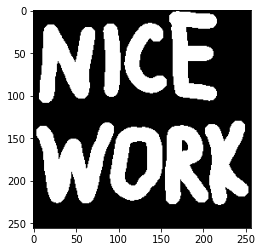

image shape:  (256, 256, 3)
pixel space in position (100, 150):  [0 0 0]
image type:  uint8


In [44]:
# read a smaller image to reduce the time of doing convolution
import cv2
from  matplotlib import pyplot as plt
import numpy as np
image = cv2.imread("nicework.png").astype('uint8')
# image = cv2.imread('nicework.png',cv2.IMREAD_GRAYSCALE)
# image = image[:, :, ::-1]

# show the image
# plt.imshow(image)
plt.imshow(image)
plt.show()

# show the detail
print('image shape: ', image.shape) # show the image's shape(dimention).
print('pixel space in position (100, 150): ', image[100,150]) # one pixel color space.
print('image type: ', image.dtype) # show the format in which the image is stored. 

rgb convolution


 98%|█████████▊| 256/262 [00:10<00:00, 23.80it/s]


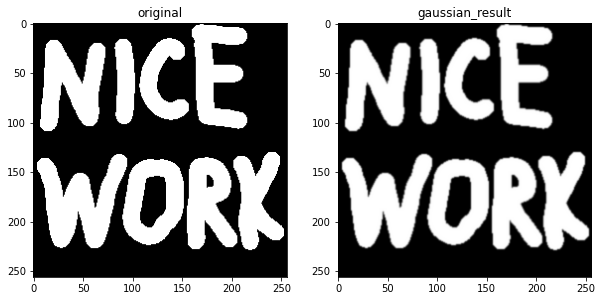

In [45]:
# ------------ to do ------------ #
# you should plot both the original image and the image after having convlution with the kernel.
# you should print their shape.

# -------- To do ------------- #
image_int = image.astype('int32')
result_img = convolution(image_int, get_kernel('gaussian'))
plt.figure(figsize = (10,20))
plt.subplot(121)
plt.imshow(image_int)
plt.title('original')

plt.subplot(122)
plt.imshow(result_img)
plt.title('gaussian_result')

plt.show()
# ------------------------------- #

## sharpening

rgb convolution


 99%|█████████▉| 256/258 [00:09<00:00, 26.80it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


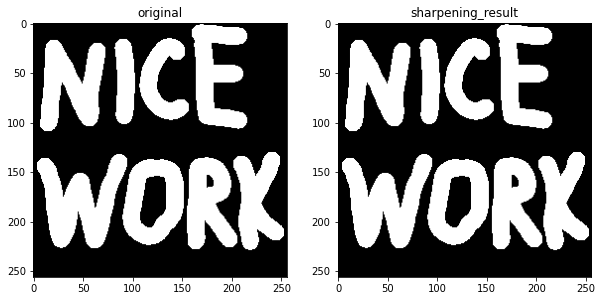

In [46]:
# you could use the function in your previous work.
# use [0 -1 0] to sharp your image
#  [-1 5 -1]
#  [0 -1 0]

# -------- To do ------------- #
image_int = image.astype('int32')
result_img = convolution(image_int, get_kernel('sharpening'))
plt.figure(figsize = (10,20))
plt.subplot(121)
plt.imshow(image_int)
plt.title('original')

plt.subplot(122)
plt.imshow(result_img)
plt.title('sharpening_result')

plt.show()
# ------------------------------- #

## mean

rgb convolution


 98%|█████████▊| 256/262 [00:08<00:00, 29.02it/s]


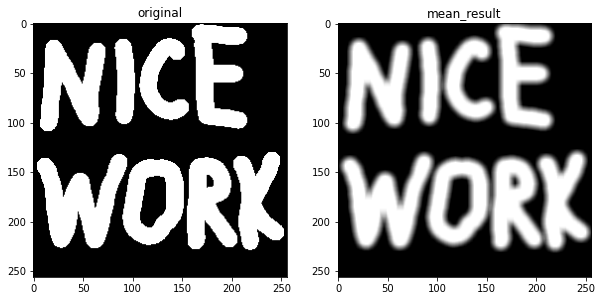

In [47]:
# -------- To do ------------- #
image_int = image.astype('int32')
result_img = convolution(image_int, get_kernel('mean'))
plt.figure(figsize = (10,20))
plt.subplot(121)
plt.imshow(image_int)
plt.title('original')

plt.subplot(122)
plt.imshow(result_img)
plt.title('mean_result')

plt.show()
# ------------------------------- #

## shift

rgb convolution


 98%|█████████▊| 256/262 [00:09<00:00, 27.01it/s]


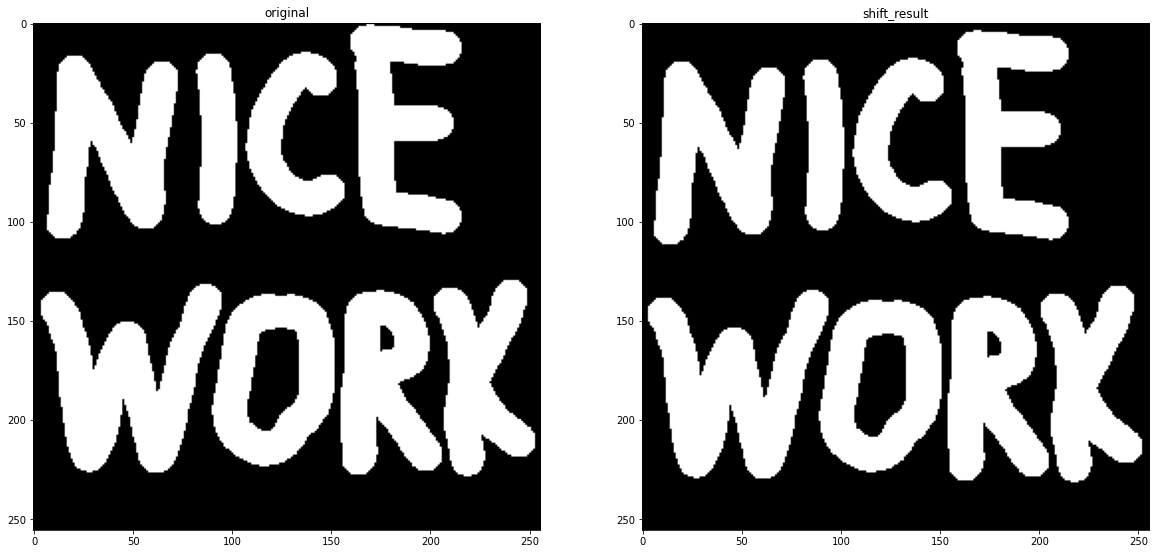

original shape:  (256, 256, 3)
shift_result shape:  (256, 256, 3)


In [48]:
# -------- To do ------------- #
image_int = image.astype('int32')
res = convolution(image_int, get_kernel('shift'))
# ------------------------------- #


# here we make the figsize bigger to see the different
plt.figure(figsize=(20, 40))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('original')

plt.subplot(1, 2, 2)
plt.imshow(res)
plt.title('shift_result')
plt.show()

print('original shape: ', image.shape)
print('shift_result shape: ', res.shape)

## sobel

In [49]:
def iterate_regions(img, kernel_size):
    h, w = img.shape
    for i in range(h - kernel_size + 1):
        for j in range(w - kernel_size + 1):
            img_region = img[i:(i + kernel_size), j:(j + kernel_size)]
            yield img_region, i, j

In [50]:
# this function should provide 3 mode: 'dx', 'dy'and 'magnitude'
def Sobel(img, filtering_type):
  try: 
    row, col, depth = img.shape
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    h, w = img.shape
    horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    if filtering_type == 'dx':
      # -------- To do ------------- #
      result_img = convolution(img, vertical)
      # ------------------------------- #
    elif filtering_type == 'dy':
      # -------- To do ------------- #
      result_img = convolution(img, horizontal)
      # ------------------------------- #
    elif filtering_type == 'magnitude':
      # -------- To do ------------- #
      sobel_dx = convolution(img, horizontal)
      sobel_dy = convolution(img, vertical)
      result_img = np.sqrt(np.power(sobel_dx, 2) + np.power(sobel_dy, 2))* 255
      # ------------------------------- #

    return np.abs(result_img.astype('int32'))
  except ValueError:
    h, w = img.shape
    horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    Gx = np.zeros((h, w))
    Gy = np.zeros((h, w))

    if filtering_type == 'dx':
      # -------- To do ------------- #
      result_img = convolution(img, horizontal)
      print(result_img[0,0])
      # ------------------------------- #
    elif filtering_type == 'dy':
      # -------- To do ------------- #
      result_img = convolution(img, vertical)
      # ------------------------------- #
    elif filtering_type == 'magnitude':
      # -------- To do ------------- #
      sobel_dx = convolution(img, horizontal)
      sobel_dy = convolution(img, vertical)
      result_img = np.sqrt(np.power(sobel_dx, 2) + np.power(sobel_dy, 2))* 255
      # ------------------------------- #
    return np.abs(result_img.astype('int32'))

grayscale convolution


 99%|█████████▉| 254/256 [00:00<00:00, 2131.84it/s]


grayscale convolution


 99%|█████████▉| 254/256 [00:00<00:00, 2123.41it/s]


grayscale convolution


 99%|█████████▉| 254/256 [00:00<00:00, 2158.19it/s]


grayscale convolution


 99%|█████████▉| 254/256 [00:00<00:00, 2100.48it/s]


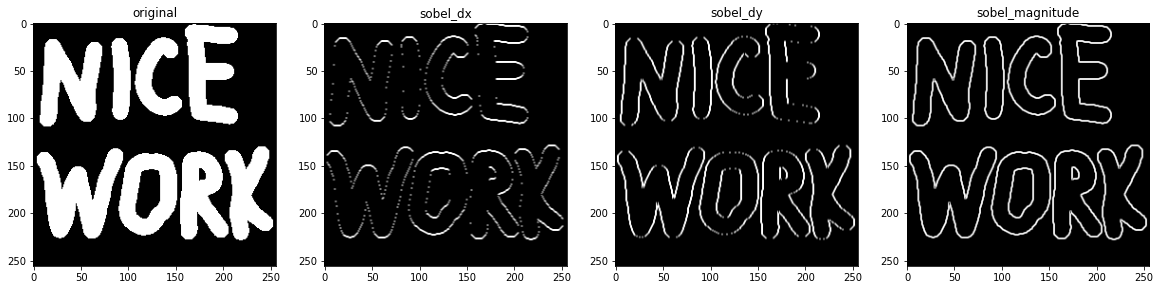

original shape:  (256, 256, 3)
sobel_dx shape:  (256, 256)
sobel_dy shape:  (256, 256)
sobel_magnitude shape:  (256, 256)


In [51]:
res = Sobel(image, 'dx')
res2 = Sobel(image, 'dy')
res3 = Sobel(image, 'magnitude')

plt.figure(figsize=(20, 60))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('original')

plt.subplot(1, 4, 2)
plt.imshow(res, cmap='gray')
plt.title('sobel_dx')

plt.subplot(1, 4, 3)
plt.imshow(res2, cmap='gray')
plt.title('sobel_dy')

plt.subplot(1, 4, 4)
plt.imshow(res3, cmap='gray')
plt.title('sobel_magnitude')
plt.show()

print('original shape: ', image.shape)
print('sobel_dx shape: ', res.shape)
print('sobel_dy shape: ', res2.shape)
print('sobel_magnitude shape: ', res3.shape)

# other image processing technics

## thresholding

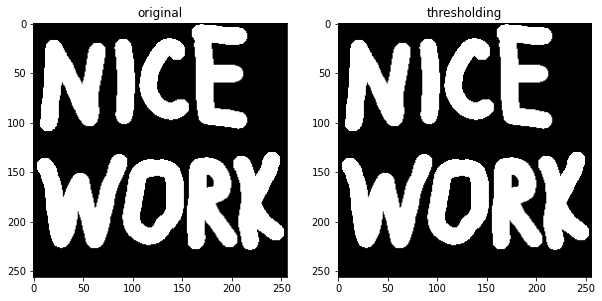

original shape:  (256, 256, 3)
thresholding shape:  (256, 256)


In [52]:
# this function should always outputs a grayscale image
# In this part, input a rgb image

def Thresholding(img, threshold = 125):
  try:
    # -------- To do ------------- #
    b,g,r = cv2.split(img)
    gray = r*0.299 + g*0.587 + b*0.114
    for x in range(gray.shape[0]):
        for y in range(gray.shape[1]):
            if gray[x,y]>125:
                gray[x,y] = 255
            else:
                gray[x,y] = 0
    # ------------------------------- #
    return gray
  except:
    # -------- To do ------------- #
    img_ = img
    # ------------------------------- #
    return img_

res = Thresholding(image, 125)

plt.figure(figsize=(10, 40))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('original')

plt.subplot(1, 2, 2)
plt.imshow(res, cmap='gray')
plt.title('thresholding')
plt.show()
print('original shape: ', image.shape)
print('thresholding shape: ', res.shape)

## downsampling

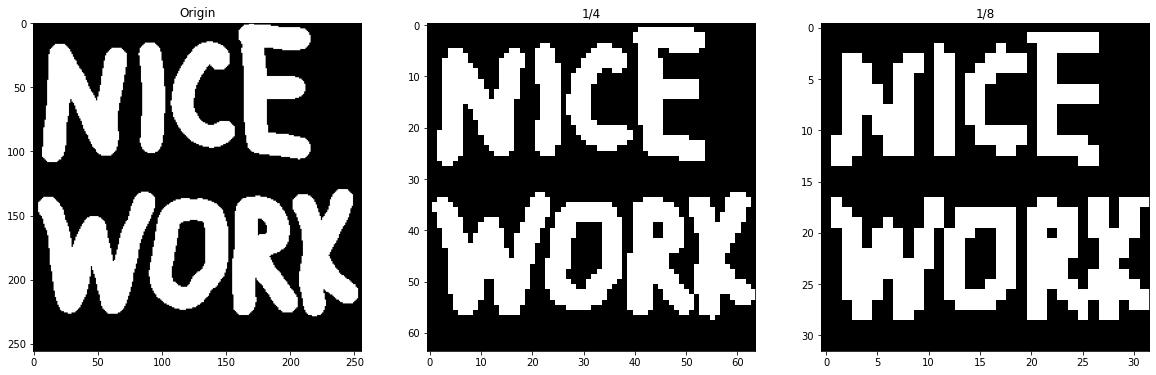

original image:  (256, 256, 3)
1/4 image:  (64, 64, 3)
1/8 image:  (32, 32, 3)


In [53]:
# define a function that downsample the image with the input image matrix and the scale.
# the function will return a modefied image matrix.
# plot the original image your result with 2 scale, 1/4 and 1/8, also their shape.

def Downsampling(src,samplingScale):
  try:
    [row,col,depth]=src.shape
    #新圖片大小為:newrow=row*samplingScale  newcol=col*samplingScale
    dst=np.zeros((round(row*samplingScale),round(col*samplingScale),depth))
    if samplingScale < 1:
      for x in range(round(row*samplingScale)):
        for y in range(round(col*samplingScale)):
          # -------- To do ------------- #
            small_time =int(1/samplingScale)
            for d in range(src.shape[2]):
              dst[x,y,d] = src[small_time*x,small_time*y,d]
    else:
      for d in range(src.shape[2]):
        for x in trange(row):
          for y in range(col):
            for i in range(x*samplingScale+(samplingScale-1),x*samplingScale+(samplingScale-1)-samplingScale,-1):
              for j in range(y*samplingScale+(samplingScale-1),y*samplingScale+(samplingScale-1)-samplingScale,-1):
                # print(x,y,i,j)
                dst[i,j,d] = src[x,y,d]
  
      # ------------------------------- #
    return dst.astype('uint8')
  except ValueError:
    print('except')
    [row,col]=src.shape
    dst=np.zeros((round(row*samplingScale),round(col*samplingScale)))
    if samplingScale < 1:
      for x in trange(round(row*samplingScale)):
        for y in range(round(col*samplingScale)):
          # -------- To do ------------- #
          small_time =int(1/samplingScale)
          dst[x,y] = src[small_time*x,small_time*y]
          # ------------------------------- #
    else:
      for x in trange(row):
        for y in range(col):
          for i in range(x*samplingScale+(samplingScale-1),x*samplingScale+(samplingScale-1)-samplingScale,-1):
              for j in range(y*samplingScale+(samplingScale-1),y*samplingScale+(samplingScale-1)-samplingScale,-1):
                dst[i,j] = src[x,y]
    return dst.astype('uint8')

img_1_8 = Downsampling(image, 1/8)
img_1_4 = Downsampling(image, 1/4)

plt.figure(figsize=(20,40))
plt.subplot(1,3,1)
plt.title('Origin')
plt.imshow(image)
plt.subplot(1,3,2)
plt.title('1/4')
plt.imshow(img_1_4)
plt.subplot(1,3,3)
plt.title('1/8')
plt.imshow(img_1_8)
plt.show() 

print('original image: ', image.shape)
print('1/4 image: ', img_1_4.shape)
print('1/8 image: ', img_1_8.shape)

### downsampling with gaussian blur filter
this will reduce the aliasing!

rgb convolution


 98%|█████████▊| 256/262 [00:09<00:00, 27.08it/s]


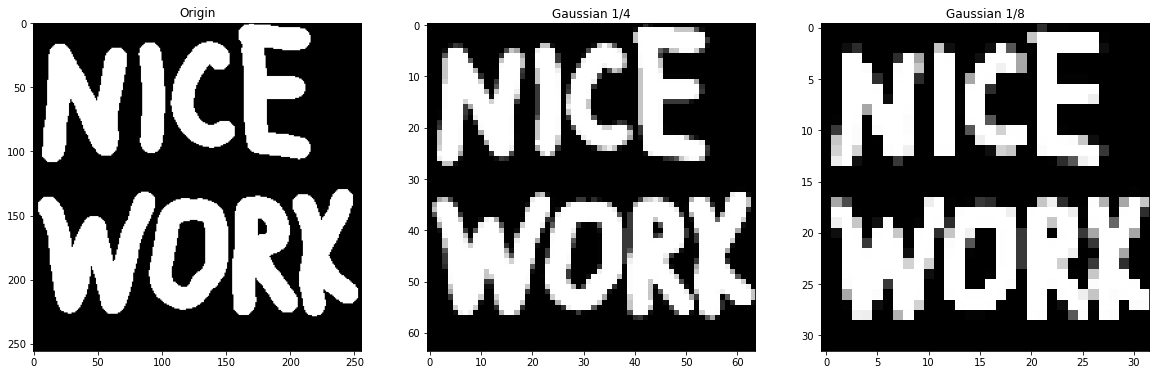

original image:  (256, 256, 3)
1/4 image:  (64, 64, 3)
1/8 image:  (32, 32, 3)


In [54]:
img_G = convolution(image, get_kernel('gaussian'))

img_G_1_8 = Downsampling(img_G,1/8)
img_G_1_4 = Downsampling(img_G,1/4)

plt.figure(figsize=(20,40))
plt.subplot(1,3,1)
plt.title('Origin')
plt.imshow(image)
plt.subplot(1,3,2)
plt.title('Gaussian 1/4')
plt.imshow(img_G_1_4)
plt.subplot(1,3,3)
plt.title('Gaussian 1/8')
plt.imshow(img_G_1_8)
plt.show() 

print('original image: ', image.shape)
print('1/4 image: ', img_G_1_4.shape)
print('1/8 image: ', img_G_1_8.shape)

## upsampling (nearst neighbor interpolation) 

100%|██████████| 32/32 [00:00<00:00, 1979.96it/s]


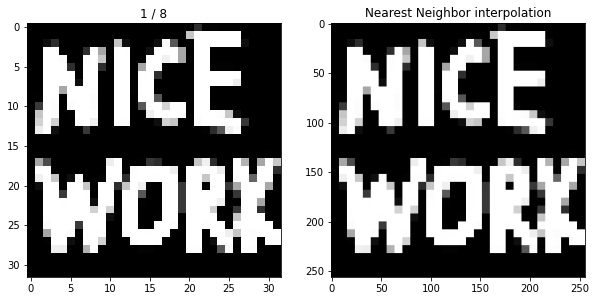

1/8 shape:  (32, 32, 3)
upsampling shape:  (256, 256, 3)


In [55]:
# resize the 1/8 to the original size

# -------- To do ------------- #
img_nn = Downsampling(img_G_1_8,8)
# ------------------------------- #

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('1 / 8')
plt.imshow(img_G_1_8)
plt.subplot(1,2,2)
plt.title('Nearest Neighbor interpolation')
plt.imshow(img_nn)
plt.show() 

print('1/8 shape: ', img_G_1_8.shape)
print('upsampling shape: ', img_nn.shape)

# morphology
This is usually apply to a binary image.

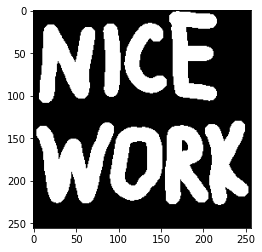

image shape:  (256, 256)
image dtype:  uint8


In [56]:
# read a binary image
from  matplotlib import pyplot as plt
import cv2
import numpy as np
image_gray = cv2.imread('nicework.png', cv2.IMREAD_UNCHANGED)

plt.imshow(image_gray, cmap = 'gray')
plt.show()
print('image shape: ', image_gray.shape)
print('image dtype: ', image_gray.dtype)

## dilation (膨脹)

 99%|█████████▉| 254/256 [00:00<00:00, 1977.28it/s]


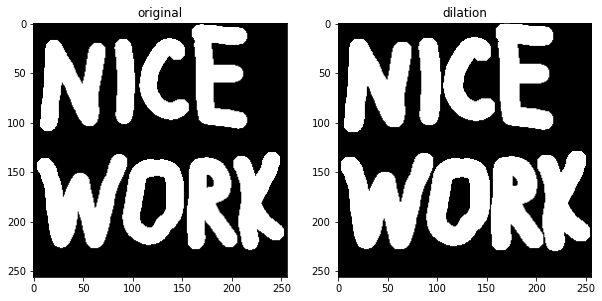

original shape:  (256, 256)
dilation shape:  (256, 256)


In [57]:
def Dilation(img, kernel):
  row, col = img.shape
  dilation_img = np.zeros((row, col))
  kernelsize = kernel.shape[0]
  img = padding_img(img, (kernelsize-1)//2, channel = 1)
  
  # -------- To do ------------- #
  for y in trange(col):
    if y > col - kernelsize:
      break
    for x in range(row):
      if x > row - kernelsize:
        break
      total =(kernel * img[x:x+kernelsize,y:y+kernelsize]).sum()
      if int(total)>1:
        dilation_img[x,y] = 255
      else:
        dilation_img[x,y] = 0  
  # ------------------------------- #    
  return dilation_img

res = Dilation(image_gray, get_kernel('dilation', kernel_size = 3))

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(image_gray, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('dilation')
plt.imshow(res, cmap = 'gray')
plt.show()

print('original shape: ', image_gray.shape)
print('dilation shape: ', res.shape)

## erosion (侵蝕)

 99%|█████████▉| 254/256 [00:00<00:00, 1862.57it/s]


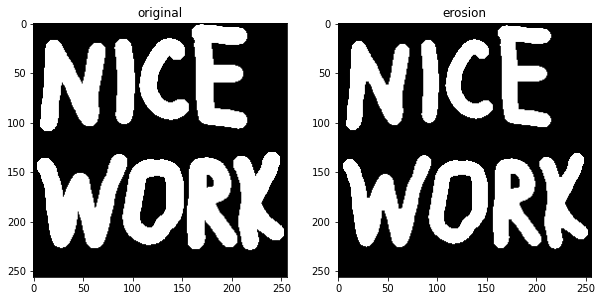

original shape:  (256, 256)
erosion shape:  (256, 256)


In [58]:
def Erosion(img, kernel,e_trans=255,be_trans = 0):
  row, col = img.shape
  erosion_img = np.zeros((row, col))
  kernelsize = kernel.shape[0]
  img = padding_img(img, (kernelsize-1)//2, channel = 1)

  # -------- To do ------------- #
  for y in trange(col):
    if y > col - kernelsize:
      break
    for x in range(row):
      if x > row - kernelsize:
        break
      total =(kernel * img[x:x+kernelsize,y:y+kernelsize]).sum()
      if int(total)==e_trans*kernelsize*kernelsize:
        erosion_img[x,y] = 255
      else:
        erosion_img[x,y] = 0  
  # ------------------------------- #
  return erosion_img

res = Erosion(image_gray, get_kernel('erosion', kernel_size = 3))

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(image_gray, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('erosion')
plt.imshow(res, cmap = 'gray')
plt.show()

print('original shape: ', image_gray.shape)
print('erosion shape: ', res.shape)

# image transformation

## pre-defined function

In [59]:
import math

def get_affine_matrix(matrix_name):
  if matrix_name == 'reflection':
    return np.array([[-1, 0], [0, 1]])

  if matrix_name == 'rotate':
    return np.array([[math.cos(math.pi/6), -math.sin(math.pi/6)], [math.sin(math.pi/6), math.cos(math.pi/6)]])

  if matrix_name == 'scale':
    return np.array([[2, 0], [0, 1]])

In [60]:
def reflect(img, affine_matrix):
  try:
    row, col, depth = img.shape
    result_img = np.zeros((row, col, depth))
    # -------- To do ------------- #
    for d in range(3):
        for c in range(col):
            for r in range(row):
                c_new,r_new = affine_matrix.dot(np.array([c,r]))
                result_img[r_new,c_new+col-1,d] = img[r,c,d]
    # ------------------------------- #
    return result_img.astype('int32')
  except ValueError:
    row, col = img.shape
    result_img = np.zeros([row,col])
    for c in range(col):
      for r in range(row):
        c_new,r_new = affine_matrix.dot(np.array([c,r]))
        result_img[r_new,c_new+col-1] = img[r,c]
    return result_img.astype('int32')
    # ------------------------------- #


In [61]:
def Rotate(img,affine_matrix):
    try:
        row, col, depth = img.shape
        rot_img = np.uint8(np.full((img.shape), 255))
        for i in range(row):
            for j in range(col):
                x,y = affine_matrix.dot(np.array([i,j]))
                x=round(x) 
                y=round(y) 
                if (x>=0 and y>=0 and x<row and  y<col):
                    rot_img[i,j,:] = img[x,y,:]
        return rot_img.astype('int32')
    except ValueError:
        row, col = img.shape
        rot_img = np.uint8(np.full((img.shape), 255))
        for i in range(row):
            for j in range(col):
                x,y = affine_matrix.dot(np.array([i,j]))
                x=round(x) 
                y=round(y) 
                if (x>=0 and y>=0 and x<row and  y<col):
                    rot_img[i,j] = img[x,y]
        return rot_img.astype('int32')

In [62]:
def Scale(img,affine_matrix):
    multi_x = affine_matrix[1,1]
    multi_y = affine_matrix[0,0]
    print(multi_x,multi_y)
    try:
        row, col, depth = img.shape
        rot_img = np.uint8(np.full((row, col, depth ), 255))
        for i in range(row):
            for j in range(col):
                y,x = affine_matrix.dot(np.array([j,i]))
                y_shape,x_shqpe = affine_matrix.dot(np.array([col,row]))
                x=round(x) 
                y=round(y) 
                if (x>=0 and y>=0 and x<x_shqpe and  y<y_shape):
                    rot_img[i,j,:] = img[x//multi_x**2,y//multi_y**2,:]
        return rot_img
    except ValueError:
        row, col = img.shape
        rot_img = np.uint8(np.full((row, col), 255))
        for i in range(row):
            for j in range(col):
                y,x = affine_matrix.dot(np.array([j,i]))
                y_shape,x_shqpe = affine_matrix.dot(np.array([col,row]))
                x=round(x) 
                y=round(y) 
                if (x>=0 and y>=0 and x<x_shqpe and  y<y_shape):
                    rot_img[i,j] = img[x//multi_x**2,y//multi_y**2]
        return rot_img

## reflection

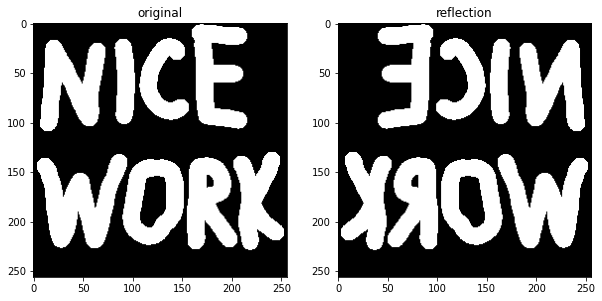

original shape:  (256, 256, 3)
reflection shape:  (256, 256, 3)


In [63]:
res = reflect(image, get_affine_matrix('reflection'))

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(image, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('reflection')
plt.imshow(res, cmap = 'gray')
plt.show()

print('original shape: ', image.shape)
print('reflection shape: ', res.shape)

## rotate

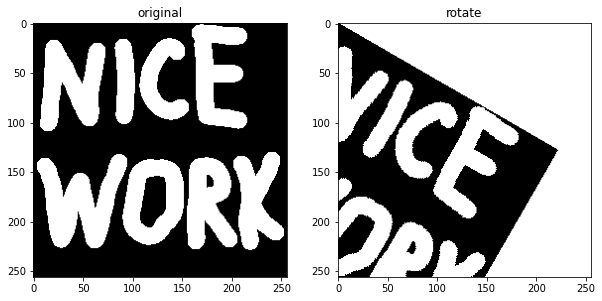

original shape:  (256, 256, 3)
rotate shape:  (256, 256, 3)


In [64]:
res = Rotate(image, get_affine_matrix('rotate'))

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(image, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('rotate')
plt.imshow(res, cmap = 'gray')
plt.show()

print('original shape: ', image.shape)
print('rotate shape: ', res.shape)

## scale

1 2


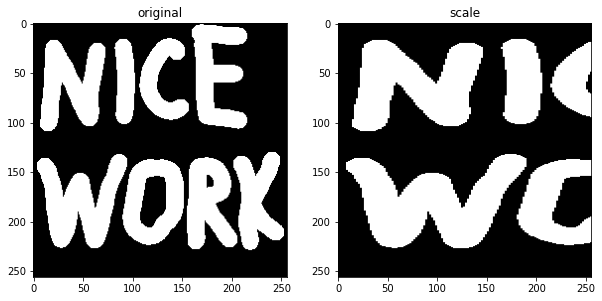

original shape:  (256, 256, 3)
scale shape:  (256, 256)


In [65]:
res = Scale(image_gray, get_affine_matrix('scale'))

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(image, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('scale')
plt.imshow(res, cmap = 'gray')
plt.show()

print('original shape: ', image.shape)
print('scale shape: ', res.shape)

## 包裝函式

In [66]:
def plot_image(orgin_img, img, threshold_flag = 0):
  plt.figure(figsize=(10,20))

  if threshold_flag:
    print('a')
    plt.subplot(1,2,1)
    plt.imshow(orgin_img)
    plt.subplot(1,2,2)
    plt.imshow(img, cmap = 'gray')
    plt.show()
    print('original shape: ', orgin_img.shape)
    print('modified shape: ', img.shape)
  else:
    try: 
      print('b')
      row, col, depth = orgin_img.shape
      plt.subplot(1,2,1)
      plt.imshow(orgin_img)
      plt.subplot(1,2,2)
      plt.imshow(img)
      plt.show()
      print('original shape: ', orgin_img.shape)
      print('modified shape: ', img.shape)
    except ValueError:
      print('c')
      plt.subplot(1,2,1)
      plt.imshow(orgin_img, cmap = 'gray')
      plt.subplot(1,2,2)
      plt.imshow(img, cmap = 'gray')
      plt.show()
      print('original shape: ', orgin_img.shape)
      print('modified shape: ', img.shape)

def invert(img):
  print('* ---------- invert ---------- *')
  result = 255 - img
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def darken(img):
  print('* ---------- darken ---------- *')
  image_int = img.copy()
  image_int[img<128]=128 
  result = image_int-128
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def lighten(img):
  print('* ---------- lighten ---------- *')
  image_int = img.astype('int32') 
  result = np.clip(image_int + 128,0,255) 
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def lower_contrast(img):
  print('* ---------- lower contrast ---------- *')
  result = (img/2)
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def raise_contrast(img):
  print('* ---------- raise contrast ---------- *')
  image_int = img.astype('int32')
  result = np.clip(image_int*2,0,255)
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def non_linear_lower_contrast(img):
  print('* ---------- non_linear_lower_contrast ---------- *')
  result = np.clip(255*(image/255)**(1/3),0,255)
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def non_linear_raise_contrast(img):
  print('* ---------- non_linear_raise_contrast ---------- *')
  result = np.clip(255*(image/255)**2,0,255)
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def gaussian(img):
  print('* ---------- gaussian ---------- *')
  result = convolution(img, get_kernel('gaussian'))
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def sharpening(img):
  print('* ---------- sharpening ---------- *')
  result = np.clip(convolution(img, get_kernel('sharpening')), 0, 255)
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def mean(img):
  print('* ---------- mean ---------- *')
  result = convolution(img, get_kernel('mean'))
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def shift(img):
  print('* ---------- shift ---------- *')
  result = convolution(img, get_kernel('shift'))
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def sobel(img, filtering_type):
  print('* ---------- sobel ---------- *')
  result = Sobel(img, filtering_type)
  plot_image(img, result, threshold_flag = 0)
  return result

def thresholding(img, threshold = 125):
  print('* ---------- thresholding ---------- *')
  result = Thresholding(img, threshold)
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 1)
  return result

def downsampling(img, scale):
  print('* ---------- downsampling ---------- *')
  result = Downsampling(img, scale)
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def upsampling(img, scale):
  print('* ---------- upsampling ---------- *')
  result = Downsampling(img, scale)
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def dilation(img):
  print('* ---------- dilation ---------- *')
  result = Dilation(img, get_kernel('dilation', kernel_size = 3))
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def erosion(img):
  print('* ---------- erosion ---------- *')
  result = Erosion(img, get_kernel('erosion', kernel_size = 3))
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def reflection(img):
  print('* ---------- reflection ---------- *')
  result = reflect(img, get_affine_matrix('reflection'))
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def rotate(img):
  print('* ---------- rotate ---------- *')
  result = Rotate(img, get_affine_matrix('rotate'))
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result

def scale(img):
  print('* ---------- scale ---------- *')
  result = Scale(img, get_affine_matrix('scale'))
  result = result.astype('uint8')
  plot_image(img, result, threshold_flag = 0)
  return result


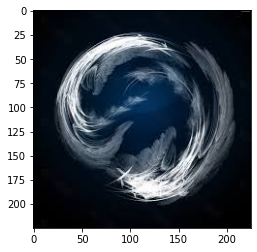

image shape:  (225, 225, 3)
pixel space in position (100, 150):  [ 1 22 49]
image type:  uint8


In [67]:
# read a smaller image to reduce the time of doing convolution
image = cv2.imread("images.jpeg").astype('uint8')
image = image[:, :, ::-1]

# show the image
plt.imshow(image)
plt.show()

# show the detail
print('image shape: ', image.shape) # show the image's shape(dimention).
print('pixel space in position (100, 150): ', image[100,150]) # one pixel color space.
print('image type: ', image.dtype) # show the format in which the image is stored.

## 測試

* ---------- invert ---------- *
b


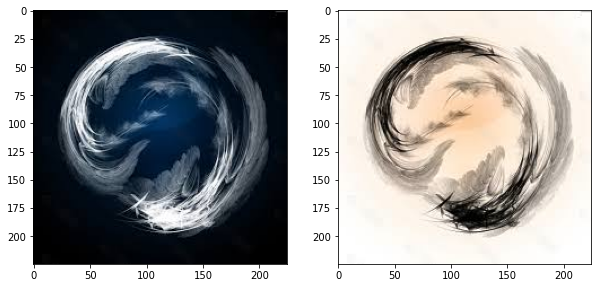

original shape:  (225, 225, 3)
modified shape:  (225, 225, 3)
* ---------- thresholding ---------- *
a


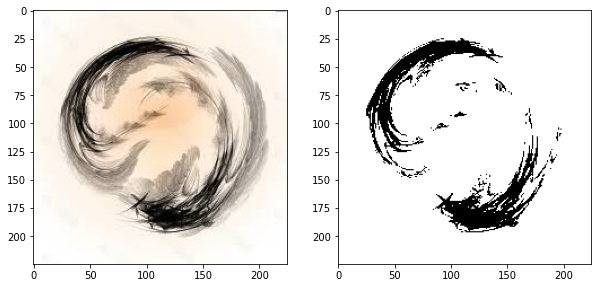

original shape:  (225, 225, 3)
modified shape:  (225, 225)
* ---------- sobel ---------- *
grayscale convolution


 99%|█████████▉| 223/225 [00:00<00:00, 2282.24it/s]


grayscale convolution


 99%|█████████▉| 223/225 [00:00<00:00, 2156.42it/s]

b
c


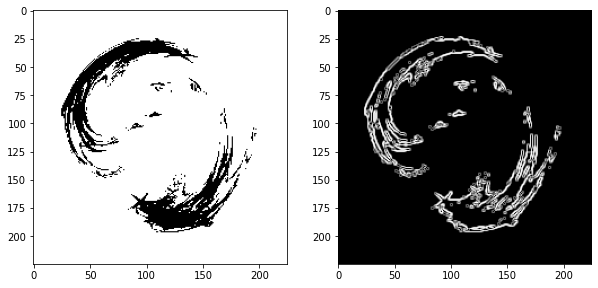

original shape:  (225, 225)
modified shape:  (225, 225)
* ---------- reflection ---------- *
b
c


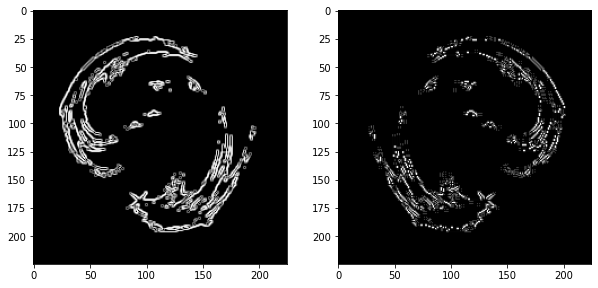

original shape:  (225, 225)
modified shape:  (225, 225)
* ---------- rotate ---------- *
b
c


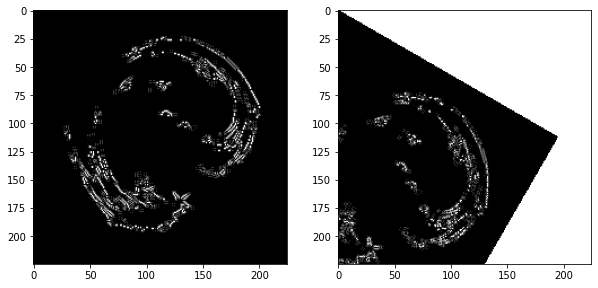

original shape:  (225, 225)
modified shape:  (225, 225)
* ---------- scale ---------- *
1 2
b
c


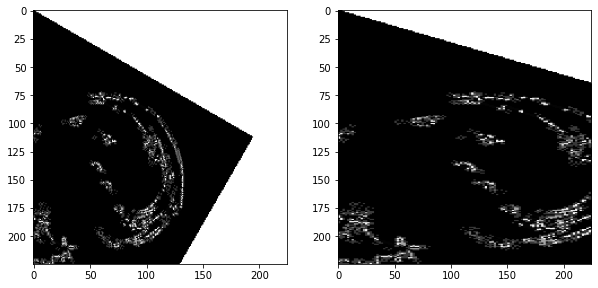

original shape:  (225, 225)
modified shape:  (225, 225)
* ---------- downsampling ---------- *
except


100%|██████████| 28/28 [00:00<00:00, 130200.12it/s]

b
c


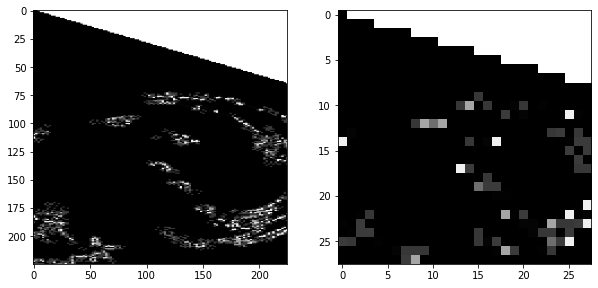

original shape:  (225, 225)
modified shape:  (28, 28)
* ---------- upsampling ---------- *
except


100%|██████████| 28/28 [00:00<00:00, 3081.30it/s]

b
c


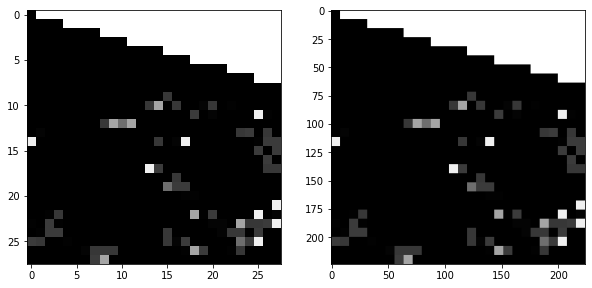

original shape:  (28, 28)
modified shape:  (224, 224)
* ---------- erosion ---------- *


 99%|█████████▉| 222/224 [00:00<00:00, 2298.36it/s]

b
c


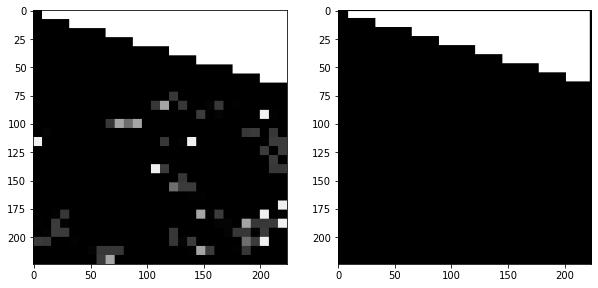

original shape:  (224, 224)
modified shape:  (224, 224)


In [68]:
# you may not have to plot every image during the process, but you must plot the final result !

test = invert(image)
test = thresholding(test)
test = sobel(test, 'magnitude')
test = reflection(test)
test = rotate(test)
test = scale(test)
test = downsampling(test, 1/8)
test = upsampling(test, 8)
test = erosion(test)